In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-01-17 11:34:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-01-17 11:34:21 (11.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [8]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         132 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    seaborn-0.9.0              |     pyh91ea838_1         164 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0       --> 2019.11.27-0       anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_0  anaconda
    openssl:         1.1.1d-h7b6447c_3  --> 1.1.1-h7b6447c_0   anaconda
    seaborn:         0.9.0-py

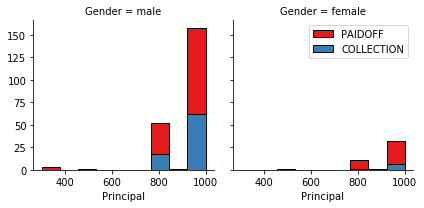

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

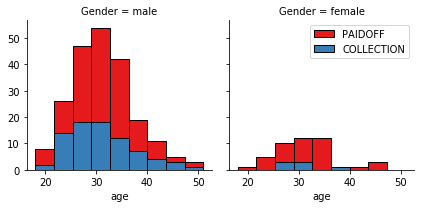

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

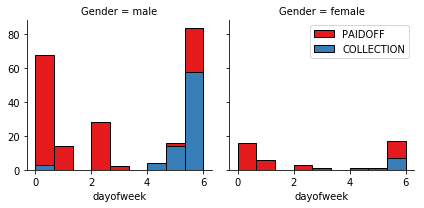

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [22]:
merge = pd.concat([X, df['loan_status']], axis=1, sort=False)
merge.head()
merge.corr(method='pearson')

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
Principal,1.000000,0.521876,-0.060893,-0.005134,0.089006,0.022212,0.011206,-0.021506
terms,0.521876,1.000000,-0.064762,-0.032399,0.084842,-0.057337,0.101787,-0.052172
age,-0.060893,-0.064762,1.000000,-0.010519,0.000431,0.057065,0.066836,-0.131585
Gender,-0.005134,-0.032399,-0.010519,1.000000,-0.079157,0.082229,-0.043927,-0.006420
weekend,0.089006,0.084842,0.000431,-0.079157,1.000000,0.016430,-0.064819,0.044184
Bechalor,0.022212,-0.057337,0.057065,0.082229,0.016430,1.000000,-0.335888,-0.331958
High School or Below,0.011206,0.101787,0.066836,-0.043927,-0.064819,-0.335888,1.000000,-0.765299
college,-0.021506,-0.052172,-0.131585,-0.006420,0.044184,-0.331958,-0.765299,1.000000


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("X_train size is ", X_train.shape, "\n", "X_test size is ", X_test.shape, "\n",
      "y_train size is ", y_train.shape, "\n", "y_test size is ", y_test.shape)
print(X_train[0:5])
y_train[0:5]

X_train size is  (276, 8) 
 X_test size is  (70, 8) 
 y_train size is  (276,) 
 y_test size is  (70,)
     Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
188       1000     15   35       0        0         0                     0   
299       1000     30   26       0        1         0                     1   
239       1000     30   31       0        0         0                     0   
46        1000     15   25       0        1         0                     0   
259       1000     30   28       0        0         0                     0   

     college  
188        1  
299        0  
239        1  
46         1  
259        1  


array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [24]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [25]:
# also need to normalize the test and train dataset
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.33474248,  0.83916906, -0.19614926, -0.47756693,  0.74535599,
        -0.2773501 ,  1.26197963, -1.05887304],
       [-1.70282047, -0.9301633 , -0.19614926, -0.47756693,  0.74535599,
        -0.2773501 , -0.79240582,  0.94440028],
       [ 0.33474248, -0.9301633 , -0.04012144, -0.47756693, -1.34164079,
        -0.2773501 ,  1.26197963, -1.05887304],
       [ 0.33474248,  0.83916906, -1.13231619, -0.47756693, -1.34164079,
        -0.2773501 , -0.79240582,  0.94440028],
       [ 0.33474248,  0.83916906,  0.42796202, -0.47756693, -1.34164079,
        -0.2773501 , -0.79240582,  0.94440028]])

Test set Accuracy at k= 1 :  0.6714285714285714
Test set Accuracy at k= 2 :  0.6428571428571429
Test set Accuracy at k= 3 :  0.7285714285714285
Test set Accuracy at k= 4 :  0.6571428571428571
Test set Accuracy at k= 5 :  0.7142857142857143
Test set Accuracy at k= 6 :  0.6571428571428571
Test set Accuracy at k= 7 :  0.7428571428571429
Test set Accuracy at k= 8 :  0.7428571428571429
Test set Accuracy at k= 9 :  0.7142857142857143


Text(0, 0.5, 'Testing Accuracy')

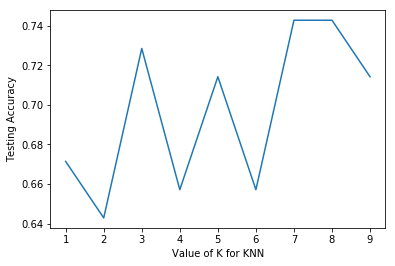

In [26]:
# finding a suitable k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_similarity_score(y_test, knn_yhat))
    accuracy_score.append(jaccard_similarity_score(y_test, knn_yhat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [27]:
# for KNN
from sklearn.neighbors import KNeighborsClassifier
# perform the test
KNN = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [28]:
# findinng the best depth level
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

# Compare accuracy result for depth = 3, 4 and 5
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_similarity_score(y_test, dt_yhat))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

Depth,F1-score,Jacard
d=3,0.620577,0.585714
d=4,0.620577,0.585714
d=5,0.648789,0.614286


In [29]:
# for Decision Trees
from sklearn.tree import DecisionTreeClassifier
# prepare DT setting
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# perform the test
DT.fit(X_train, y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


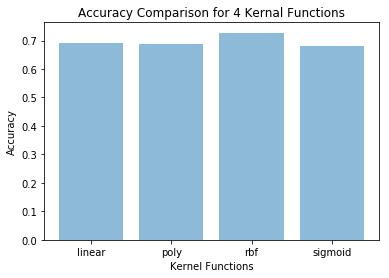

In [30]:


# for SVM
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

func_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_score = []

for func in func_list:
    SVM = svm.SVC(kernel=func)
    SVM.fit(X_train, y_train)
    svm_yhat = SVM.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average='weighted'))
    
# plot the comparison among 4 kernel functions
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(func_list))
plt.bar(y_pos, accuracy_score, align='center', alpha=0.5)
plt.xticks(y_pos, func_list)
plt.ylabel('Accuracy')
plt.xlabel('Kernel Functions')
plt.title('Accuracy Comparison for 4 Kernal Functions')
plt.show()

In [31]:
# for SVM
from sklearn import svm
# prepare SVM setting
SVM = svm.SVC(kernel='rbf')
# perform the test
SVM.fit(X_train, y_train)
SVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  0.477460130698766
Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  0.47746026240380063
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.49096560818457907
Test  3 : Accuracy at c = 0.1 solver= sag is :  0.47746160855606024
Test  4 : Accuracy at c = 0.1 solver= saga is :  0.47745454436909684
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  0.48933564178286426
Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  0.48933560490693945
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  0.5699980927778155
Test  8 : Accuracy at c = 0.01 solver= sag is :  0.489341135155927
Test  9 : Accuracy at c = 0.01 solver= saga is :  0.48933515947788603
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  0.5177257828275373
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  0.5177257382214536
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  0.6691108543335518
Test  13 : Accuracy at c = 0.001 solver= sag is :  0.5177415416114

Text(0, 0.5, 'Testing Accuracy')

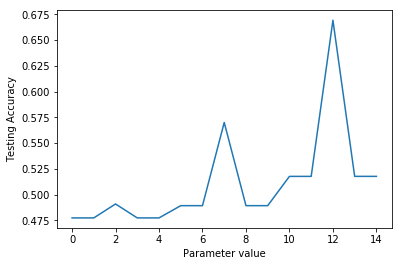

In [32]:


# for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        # perform the test
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        # it can predict the outcome
        lr_yhat = LR.predict(X_test)
        lr_prob = LR.predict_proba(X_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(X_test)
log_loss(y_test, lr_prob)
# plot the relationship between K and testing accuracy
plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')

In [33]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
# prepare LR setting
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-01-17 11:46:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-01-17 11:46:29 (285 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [35]:
test_df = pd.read_csv('loan_test.csv')
# convert date time
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
# evaulate weekend field
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# convert male to 0 and female to 1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# work out education level
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
# Testing feature
X_loan_test = test_feature
# normalize the test data
X_loan_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)
# and target result
y_loan_test = test_df['loan_status'].values
y_loan_test[0:5]
print (X_loan_test[0:5])
print (X_loan_test.shape)
print (y_loan_test[0:5])
print (y_loan_test.shape)

[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
(54, 8)
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
(54,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [36]:
# Jaccard setup
from sklearn.metrics import jaccard_similarity_score

# evaluate KNN
knn_yhat = KNN.predict(X_loan_test)
jc1 = round(jaccard_similarity_score(y_loan_test, knn_yhat), 2)
# evaluate Decision Trees
dt_yhat = DT.predict(X_loan_test)
jc2 = round(jaccard_similarity_score(y_loan_test, dt_yhat), 2)
#evaluate SVM
svm_yhat = SVM.predict(X_loan_test)
jc3 = round(jaccard_similarity_score(y_loan_test, svm_yhat), 2)
# evaluate Logistic Regression
lr_yhat = LR.predict(X_loan_test)
jc4 = round(jaccard_similarity_score(y_loan_test, lr_yhat), 2)

list_jc = [jc1, jc2, jc3, jc4]
list_jc

[0.67, 0.74, 0.8, 0.78]

In [37]:
# F1-score setup
from sklearn.metrics import f1_score

# evaluate KNN
fs1 = round(f1_score(y_loan_test, knn_yhat, average='weighted'), 2)
# evaluate Desision Trees 
fs2 = round(f1_score(y_loan_test, dt_yhat, average='weighted'), 2)
# evaluate SVM
fs3 = round(f1_score(y_loan_test, svm_yhat, average='weighted'), 2)
# evaluate Logistic Regression
fs4 = round(f1_score(y_loan_test, lr_yhat, average='weighted'),2 )

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.63, 0.76, 0.76, 0.73]

In [38]:
# LogLoss
from sklearn.metrics import log_loss
lr_prob = LR.predict_proba(X_loan_test)
list_ll = ['NA', 'NA', 'NA', round(log_loss(y_loan_test, lr_prob), 2)]
list_ll

['NA', 'NA', 'NA', 0.67]

In [39]:
import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.67,0.63,NA
Decision Tree,0.74,0.76,NA
SVM,0.80,0.76,NA
Logistic Regression,0.78,0.73,0.67
